In [40]:
# Импортируемые библиотеки
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
churn_data = pd.read_csv('data/churn.csv') #Загрузка таблицы
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
#Убираем лишнюю информацию из таблицы, столбец Rownumber
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'График_9.1_Состояние ушедших и лояльных клиентов')

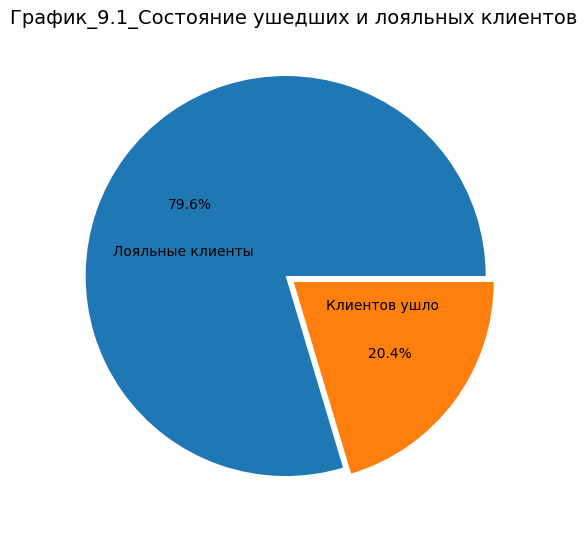

In [43]:
#Задание_9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

fig = plt.figure(figsize=(9,5)) 
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
churn_data['Exited'].value_counts(),
    labels=['Лояльные клиенты', 'Клиентов ушло'],
    autopct='%.1f%%',
    labeldistance = 0.2,
    explode = [0.05, 0]
    
)
axes.set_title('График_9.1_Состояние ушедших и лояльных клиентов', fontsize=14) 

Вывод:
Таким образом, 79,6% клиентов лояльны и остаются клиентами банка, а 20,4% клиентов ушли.
Ушедших клиентов всего 20.4%
Лоялных клиентов 79.6 %

<AxesSubplot: title={'center': 'График_9.2_Распределение баланса польователей, у которых на счету больше 2 500 долларов'}, ylabel='Frequency'>

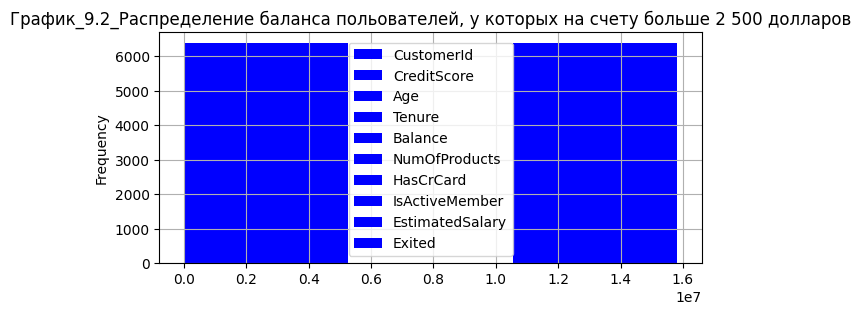

In [13]:
#Задание_9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.
filtr_balance = churn_data[churn_data['Balance'] > 2500]
#6383
filtr_balance.plot(
   kind='hist',
   figsize=(7, 3),
   title='График_9.2_Распределение баланса польователей, у которых на счету больше 2 500 долларов',
   grid= True,
   color = 'Blue',
   bins=3  
   ) 

Вывод: Распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
У 6383 это большинство пользователей на счету больше 2500 долларов. 

In [14]:
#Задание_9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших 
# и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
filtr1 = px.histogram(
    data_frame=filtr_balance, 
    x='Age', 
    color='Exited',
    height=500,
    width=700, 
    histfunc='count',
    title='График_9.3_Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
    nbins = 25
)
filtr1.show()

Cуммы на накопительном счёте у ушедших пользователей больше, чем у лояльных в возрасте 30-39 лет. 
Вывод: При увеличении суммы на накопительном счету пользователи уходят. Предпологаю связано с тем, что при накоплении большей суммы забирают деньги для определенных покупок.  

In [29]:
#Задание_9.4. Посмотрите на распределение возраста в разрезе признака оттока.
# В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
fig1 = px.histogram(
    data_frame=churn_data, 
    x='Age', #ось абсцисс
    color='Exited',
    height=400, #высота
    width=800, #ширина
    histfunc='count',
    title='График_9.4_Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
    nbins = 25
)
fig1.show()

fig2 = px.box(
    data_frame=churn_data,
    x='Age', #ось абсцисс
    color='Exited',
    height=400, #высота
    width=800, #ширина
    title='График_9.4_Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
)
fig2.show()

Вывод: В группе лояльных потенциальных выбросов больше. На возрастную группу лояльных клиентов старше 57 лет стоить обратить внимание 


In [30]:
#Задание_9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это. Задание 9.5:

salary_score_data = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()
fig = px.scatter(
    data_frame = salary_score_data,
    x = 'EstimatedSalary',
    y='CreditScore',
    color='Exited',
    height=300,
    width=700,
    title='График_9.5_Зависимость крединого рейтинга от предполагаемой заработной платы'
)
fig.show()

Вывод: На представленной диаграмме точки разбросаны хаотично, что означает отсутствие взаимосвязей между предполгаемой заработной платой и кредитным рейтингом. Зависимость признака оттока от двух этих признаков так же определить невозможно.

Text(0.5, 1.0, 'График_9.6_Чаще уходит, мужчины или женщины')

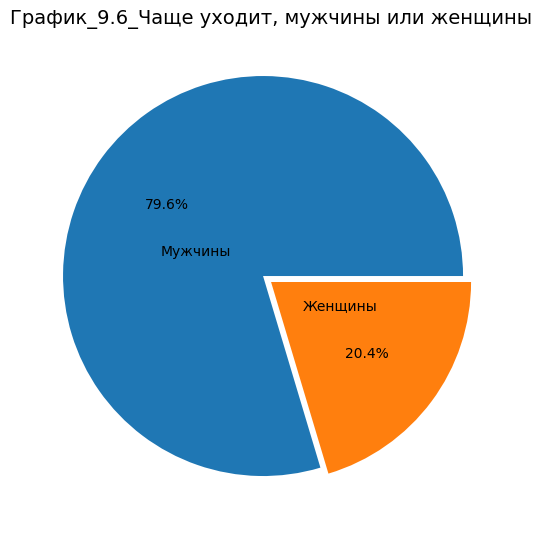

In [31]:
#Задание_9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

fig = plt.figure(figsize=(9,5)) 
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
churn_data['Exited'].value_counts(),
    labels=['Мужчины', 'Женщины'],
    autopct='%.1f%%',
    labeldistance = 0.2,
    explode = [0.05, 0]
    
)
axes.set_title('График_9.6_Чаще уходит, мужчины или женщины', fontsize=14) 

Вывод: На представленном графике видно, что чаще уходят мужчины.

Text(0.5, 1.0, 'График_9.7_Зависимость оттока клиентов от числа приобретенных услуг банка')

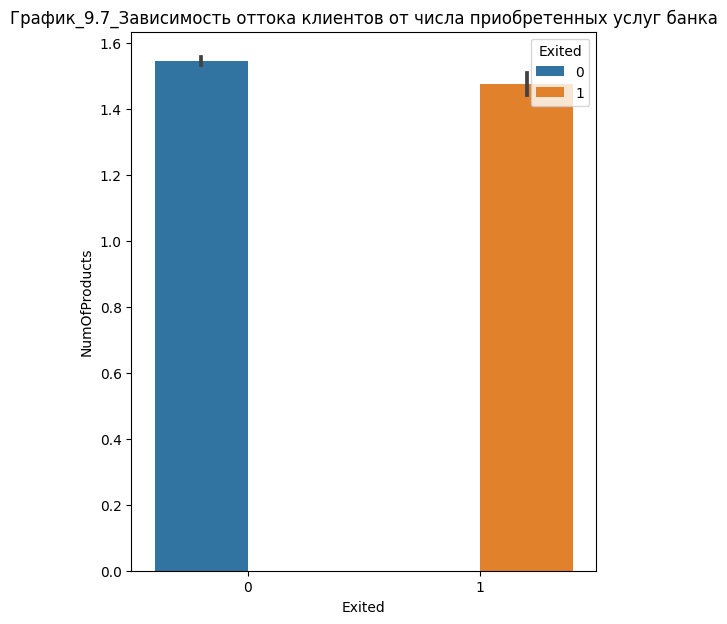

In [32]:
#Задание_9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
#NumOfProducts — количество услуг банка, которые приобрёл клиент
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

fig = plt.figure(figsize=(6, 7))

barplot = sns.barplot(
    data=churn_data,
    x='Exited',
    y='NumOfProducts',
    hue='Exited',
)
barplot.set_title('График_9.7_Зависимость оттока клиентов от числа приобретенных услуг банка')

Вывод: На представленном графике число лояльных клиентов больше, что означает взаимосвязь между приеобретенных услуг банка и лоялных клиентов. Зависимость приазнака оттока от приобретенных услуг зависит, чем больше тем клиент лояльный.

Text(0.5, 1.0, 'График_9.8_Зависимость статуса активного клиента на отток клиентов банка')

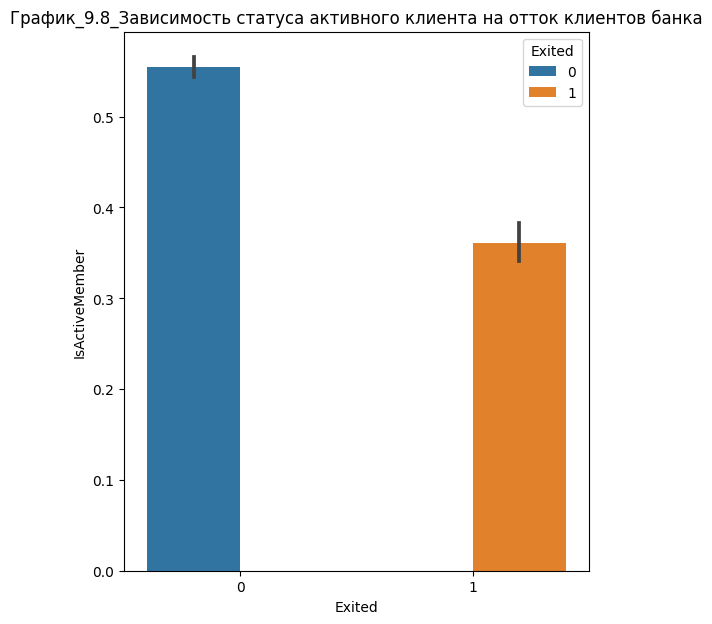

In [33]:
#Задание_9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, 
# чтобы уменьшить отток клиентов среди неактивных?
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
#IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)


fig = plt.figure(figsize=(6, 7))

barplot = sns.barplot(
    data=churn_data,
    x='Exited',
    y='IsActiveMember',
    hue='Exited',
)
barplot.set_title('График_9.8_Зависимость статуса активного клиента на отток клиентов банка')

Вывод: На представленном графике видно, что означает взаимосвязь между неактивными клиентами зависит на отток клиентов банка. 

In [34]:
#Задание_9.9 В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, 
# которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

strana = churn_data.groupby(['Geography'], as_index=False).agg('mean')
fig = px.choropleth(
    data_frame=strana, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    hover_name='Geography',
    range_color=[0, 0.5], #диапазон цвета
    title='График_9.9_Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale=px.colors.sequential.Plasma #палитра цветов
)
fig.show()

C:\Users\andrd\AppData\Local\Temp\ipykernel_13404\3952483526.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Вывод: На представленной картограмме определно, что доля ушедших клиентов по странам  больше в Germany. Предпологаю, что это может связно с недостаточным количеством услуг банка.

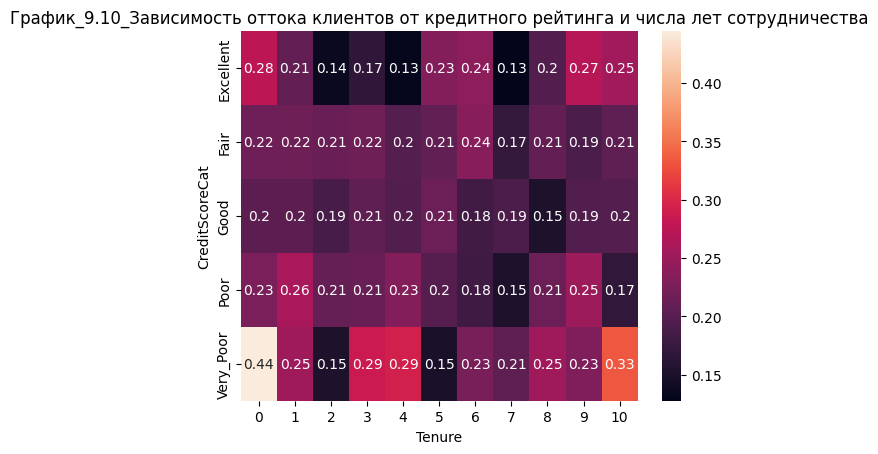

In [45]:
#Задание_9.10 Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, 
# в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока 
# (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

import seaborn as sns
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True)
ax.set_title('График_9.10_Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');

Вывод: На тепловой карте определено, что зависимость признака оттока в течении первого года по категории кредитного рейтинга very poor клиенты уходят чаще всего.